<a href="https://colab.research.google.com/github/smuriu06/my_projects/blob/main/Anonymized_Data_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Background

The report provides a comprehensive analysis of sales data, focusing on data quality, trends, and customer segmentation to derive actionable insights. The analysis begins with data cleaning and preparation, ensuring accuracy by handling missing values, duplicates, and inconsistent data types. Key features such as “Month-Year” were engineered to facilitate trend analysis.

Through exploratory data analysis, sales performance was examined across different categories and businesses, supported by visualizations. Advanced techniques, including customer segmentation, forecasting, and anomaly detection, were applied to uncover purchasing patterns and predict future trends.

Finally, strategic recommendations were made to optimize product strategy, enhance customer retention, and improve operational efficiency.
A dynamic Power BI dashboard summarizes key findings for better decision-making.

## Retrieving the Data from SQL


```
SELECT *
FROM your_table_name
WHERE Date BETWEEN '2024-01-01' AND '2024-12-31';
```
or


```
SELECT *
FROM your_table_name
WHERE YEAR(Date) = 2024;
```


```
# If date is stored as text
SELECT *
FROM your_table_name
WHERE Date LIKE '2024-%';
```

For SQL Server, you can:

* Run the query to get 2024 data.
* Click "Results to File" (CTRL+SHIFT+F).
* Save as .csv or .txt.






In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the Data
data=pd.read_csv('/content/Case_Study_Data.csv')


In [ ]:
#Viewing the shape of data
data.shape

(333405, 7)

The dataset has 33405 rows and 7 columns

In [ ]:
#Viewing the 7 specific columns of data
data.columns

Index(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT',
       'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QUANTITY', 'UNIT PRICE'],
      dtype='object')

In [ ]:
#Viewing a few rows of the data
data.head(10)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,"August 18, 2024, 9:32 PM",Category-106,Product-21f4,Business-de42,Location-1ba8,1,850
1,"August 18, 2024, 9:32 PM",Category-120,Product-4156,Business-de42,Location-1ba8,2,"1,910"
2,"August 18, 2024, 9:32 PM",Category-121,Product-49bd,Business-de42,Location-1ba8,1,"3,670"
3,"August 18, 2024, 9:32 PM",Category-76,Product-61dd,Business-de42,Location-1ba8,1,"2,605"
4,"August 18, 2024, 9:32 PM",Category-119,Product-66e0,Business-de42,Location-1ba8,5,"1,480"
5,"August 18, 2024, 9:32 PM",Category-76,Product-6e9c,Business-de42,Location-1ba8,1,"2,605"
6,"August 18, 2024, 9:32 PM",Category-120,Product-7864,Business-de42,Location-1ba8,1,"1,940"
7,"August 18, 2024, 9:32 PM",Category-119,Product-7940,Business-de42,Location-1ba8,4,"1,460"
8,"August 18, 2024, 9:32 PM",Category-96,Product-87b2,Business-de42,Location-1ba8,1,805
9,"August 18, 2024, 9:32 PM",Category-106,Product-c14c,Business-de42,Location-1ba8,1,"1,350"


#1. Data Cleaning & Preparation

## Handling Data Types

In [ ]:
#check data type
data.dtypes

,0
DATE,object
ANONYMIZED CATEGORY,object
ANONYMIZED PRODUCT,object
ANONYMIZED BUSINESS,object
ANONYMIZED LOCATION,object
QUANTITY,int64
UNIT PRICE,object


2 rows do not have correct data types:
1. DATE
2. UNIT PRICE

In [ ]:
#change Date Date and Unit Price data type
data['DATE'] = pd.to_datetime(data['DATE'])
data['UNIT PRICE'] = data['UNIT PRICE'].str.replace(',', '').astype(float)


<ipython-input-39-9f97e18fcc40>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DATE'] = pd.to_datetime(data['DATE'])


In [ ]:
#confirming the transformation of the data types
data.dtypes

,0
DATE,datetime64[ns]
ANONYMIZED CATEGORY,object
ANONYMIZED PRODUCT,object
ANONYMIZED BUSINESS,object
ANONYMIZED LOCATION,object
QUANTITY,int64
UNIT PRICE,float64


We see that the data types have been successfully updated.

## Handling Missing Values

In [ ]:
#Getting a more comprehensive view of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333405 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE                 333405 non-null  datetime64[ns]
 1   ANONYMIZED CATEGORY  333405 non-null  object        
 2   ANONYMIZED PRODUCT   333405 non-null  object        
 3   ANONYMIZED BUSINESS  333405 non-null  object        
 4   ANONYMIZED LOCATION  333405 non-null  object        
 5   QUANTITY             333405 non-null  int64         
 6   UNIT PRICE           333397 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 17.8+ MB


Above, we see:
* 8 rows are null, in the UNIT PRICE column
* further confirmation of the change in data types for DATE and UNIT PRICE

In [ ]:
#Confirming number of missing values
data.isnull().sum()

,0
DATE,0
ANONYMIZED CATEGORY,0
ANONYMIZED PRODUCT,0
ANONYMIZED BUSINESS,0
ANONYMIZED LOCATION,0
QUANTITY,0
UNIT PRICE,8


Above, we confirm that the last row named UNIT PRICE, there are 8 rows with missing values.

As the data also contains the ANONYMIZED PRODUCT COLUMN, it is possible to impute the unit price for these 8 products by using the mean value of other similar products for each product with a missing unit price.

In [ ]:
#Imputing the missing Unit Price values given in other rows with the same Product code
if data['UNIT PRICE'].isnull().any():
    data['UNIT PRICE'].fillna(data.groupby('ANONYMIZED PRODUCT')['UNIT PRICE'].transform('mean'), inplace=True)

<ipython-input-43-eb852d60d170>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['UNIT PRICE'].fillna(data.groupby('ANONYMIZED PRODUCT')['UNIT PRICE'].transform('mean'), inplace=True)


In [ ]:
#Reviewing the data again to confirm that null values have been filled
data.isnull().sum()

,0
DATE,0
ANONYMIZED CATEGORY,0
ANONYMIZED PRODUCT,0
ANONYMIZED BUSINESS,0
ANONYMIZED LOCATION,0
QUANTITY,0
UNIT PRICE,3


We can see that we still have 3 rows that still have a null unit price

In [ ]:
#View the 3 rows with null values
data[data['UNIT PRICE'].isnull()]

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
150961,2024-12-16 18:33:00,Category-79,Product-dfc8,Business-8bbf,Location-3fc0,1,NaN
278384,2024-12-30 14:17:00,Category-95,Product-15f3,Business-1a74,Location-f37d,1,NaN
310385,2024-03-31 14:03:00,Category-114,Product-9204,Business-c9dc,Location-689f,1,NaN


We can confirm if there really are no other similar products for each of the 3 products above

In [ ]:
#Count the number of rows with Anonymized Product: Product-dfc8
data[data['ANONYMIZED PRODUCT'] == 'Product-dfc8'].shape

(1, 7)

In [ ]:
#Count the number of rows with Anonymized Product: Product-15f3
data[data['ANONYMIZED PRODUCT'] == 'Product-15f3'].shape

(1, 7)

In [ ]:
#Count the number of rows with Anonymized Product: Product-9204
data[data['ANONYMIZED PRODUCT'] == 'Product-9204'].shape

(1, 7)

We see that we only have one instance for each of the 3 products with a missing unit price.

The only viable option is to drop these rows.

In [ ]:
#drop null values
data.dropna(inplace=True)

In [ ]:
#Confirming that the 3 rows have been dropped
data.shape

(333402, 7)

The shape of the data shows that the 3 rows with a missing unit price have been dropped.

## Handling Rows where Unit Price = 0 and Quantity = 0

In [ ]:
#Viewing the Descriptive Statistics of the data
data.describe()

,DATE,QUANTITY,UNIT PRICE
count,333402,333402.000000,333402.000000
mean,2024-07-17 10:20:55.072075264,2.321198,2322.029742
min,2024-01-01 05:54:00,0.000000,0.000000
25%,2024-04-28 20:59:00,1.000000,1420.000000
50%,2024-07-28 17:18:00,1.000000,1840.000000
75%,2024-10-14 14:50:00,2.000000,2755.000000
max,2024-12-31 18:24:00,359.000000,16136.000000
std,NaN,3.790629,1585.248051


Above, we see that

*   Min QUANTITY = 0
*   Min UNIT PRICE = 0,
which cannot be the case.  



### Handling Rows where Unit Price = 0

In [ ]:
#Viewing data where UNIT PRICE=0
data[data['UNIT PRICE'] == 0]

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
3257,2024-06-10 10:54:00,Category-77,Product-9532,Business-f712,Location-03fc,22,0.0
16750,2024-05-21 16:52:00,Category-79,Product-38e9,Business-35c0,Location-47dc,1,0.0
75285,2024-02-05 19:14:00,Category-76,Product-da0e,Business-63e2,Location-0451,1,0.0
85287,2024-02-06 12:36:00,Category-74,Product-1ee2,Business-f9a6,Location-006f,1,0.0
87648,2024-03-08 20:55:00,Category-82,Product-5793,Business-ceeb,Location-f37d,1,0.0
111342,2024-05-10 22:52:00,Category-79,Product-38e9,Business-1e10,Location-f37d,1,0.0
111713,2024-02-05 14:53:00,Category-105,Product-fd84,Business-1548,Location-f37d,12,0.0
149456,2024-01-16 12:51:00,Category-105,Product-fd84,Business-88f5,Location-689f,1,0.0
154792,2024-03-08 21:40:00,Category-74,Product-c1d6,Business-7fda,Location-e2f8,1,0.0
163483,2024-02-09 11:16:00,Category-82,Product-5793,Business-52fa,Location-e2f8,2,0.0


In [ ]:
#Confirming number of rows with UNIT PRICE=0
data[data['UNIT PRICE'] == 0].shape

(25, 7)

we see that 25 entries have UNIT PRICE=0

In [ ]:
#Imputing rows with UNIT PRICE=0 with price of Similar products
if (data['UNIT PRICE'] == 0).any():  # Check if any 'UNIT PRICE' value is 0
    data['UNIT PRICE'] = data['UNIT PRICE'].replace(0, np.nan)  # Replace 0 with NaN for fillna to work
    data['UNIT PRICE'].fillna(data.groupby('ANONYMIZED PRODUCT')['UNIT PRICE'].transform('mean'), inplace=True)

<ipython-input-54-841b1828729c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['UNIT PRICE'].fillna(data.groupby('ANONYMIZED PRODUCT')['UNIT PRICE'].transform('mean'), inplace=True)


In [ ]:
#Confirming that we have eliminated the number of rows with UNIT PRICE=0
data[data['UNIT PRICE'] == 0].shape

(0, 7)

## Handling Rows where Quantity = 0

In [ ]:
#Viewing data where QUANTITY=0
data[data['QUANTITY'] == 0]

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
19828,2024-12-20 21:07:00,Category-113,Product-6342,Business-4305,Location-3e32,0,2.0
48930,2024-06-02 10:18:00,Category-75,Product-4832,Business-195b,Location-c86b,0,3880.0
48931,2024-06-02 10:18:00,Category-75,Product-6aa1,Business-195b,Location-c86b,0,1960.0
48932,2024-06-02 10:18:00,Category-100,Product-f3ee,Business-195b,Location-c86b,0,2045.0
60118,2024-06-14 11:11:00,Category-120,Product-14f3,Business-1b8b,Location-c2f2,0,1850.0
63254,2024-05-09 14:06:00,Category-75,Product-8b33,Business-2592,Location-9149,0,2135.0
67161,2024-07-02 13:45:00,Category-78,Product-b409,Business-54ac,Location-e2f8,0,750.0
90630,2024-06-07 21:06:00,Category-78,Product-b409,Business-5e1d,Location-d32a,0,750.0
100956,2024-06-11 09:10:00,Category-120,Product-83fd,Business-5cac,Location-e2f8,0,1860.0
102391,2024-06-05 12:09:00,Category-105,Product-acb9,Business-af19,Location-4ea1,0,1050.0


In [ ]:
#Checking number of rows where QUANTITY=0
data[data['QUANTITY'] == 0].shape

(39, 7)

We have 39 rows where Quantity is 0.

This error could only be precisely handled at the data entry point. To keep the rows, we can only assume that the quantity is 1, as it is the minimum a customer can buy.

In [ ]:
#Replacing values where Quantity=0 with Quantity=1
data.loc[data['QUANTITY'] == 0, 'QUANTITY'] = 1

In [ ]:
#Checking if we have no rows where QUANTITY=0
data[data['QUANTITY'] == 0].shape

(0, 7)

## Handling Duplicates

In [ ]:
#Checking duplicates
data.duplicated().sum()

3524

We see that we have 3524 duplicates, which we need to drop.

In [ ]:
#Dropping duplicates
data.drop_duplicates(inplace=True)

In [ ]:
#Confirming that the rows have been dropped
data.shape

(329878, 7)

The shape of the data shows that the 3524 duplicates have been dropped.

## Feature Engineering

### Creating the Month_Year Column

In [ ]:
# Create a new column Month_Year with short-form months
data['Month_Year'] = pd.to_datetime(data['DATE']).dt.strftime('%b %Y')

In [ ]:
#Viewing the data to confirm creation of Month_Year column
data.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month_Year
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,Aug 2024
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,Aug 2024
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,Aug 2024
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0,Aug 2024
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0,Aug 2024


We have successfully created the Month_Year column

###Creating the Value column

In [ ]:
#Calculate VALUE column
data['VALUE'] = data['QUANTITY'] * data['UNIT PRICE']

In [ ]:
#viewing data to confirm creation of VALUE column
data.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month_Year,VALUE
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,Aug 2024,850.0
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,Aug 2024,3820.0
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,Aug 2024,3670.0
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0,Aug 2024,2605.0
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0,Aug 2024,7400.0


In [ ]:
#Checking data type of VALUE column
data['VALUE'].dtype

dtype('float64')

We have successfully created the VALUE column of float data type.

#2. Exploratory Data Analysis

## Sales Overview

###Total Quantity and Value by Anonymized Category

In [ ]:
#calculate total Quantity and Value grouped by Anonymized Category
category_by_quantity_value = data.groupby('ANONYMIZED CATEGORY')[['QUANTITY', 'VALUE']].sum()
#Viewing the category_by_quantity_value table
print(category_by_quantity_value)

                     QUANTITY         VALUE
ANONYMIZED CATEGORY                        
Category-100            76825  1.349048e+08
Category-101            19586  3.561902e+07
Category-102             1786  4.644630e+05
Category-104             1217  1.557598e+06
Category-105             1580  2.718352e+06
Category-106             6521  5.932763e+06
Category-107             2731  4.173901e+06
Category-108             9756  5.101375e+06
Category-109             1446  1.263226e+06
Category-110            10530  5.484384e+06
Category-111             6715  4.387343e+06
Category-113              744  1.260667e+06
Category-114                3  8.600000e+03
Category-115              348  4.253600e+05
Category-116              856  4.227450e+05
Category-117                5  1.550000e+03
Category-118               21  7.560000e+03
Category-119            68332  1.034548e+08
Category-120           169721  3.191898e+08
Category-121            14670  2.233097e+07
Category-122             1226  3

<Axes: xlabel='ANONYMIZED CATEGORY'>

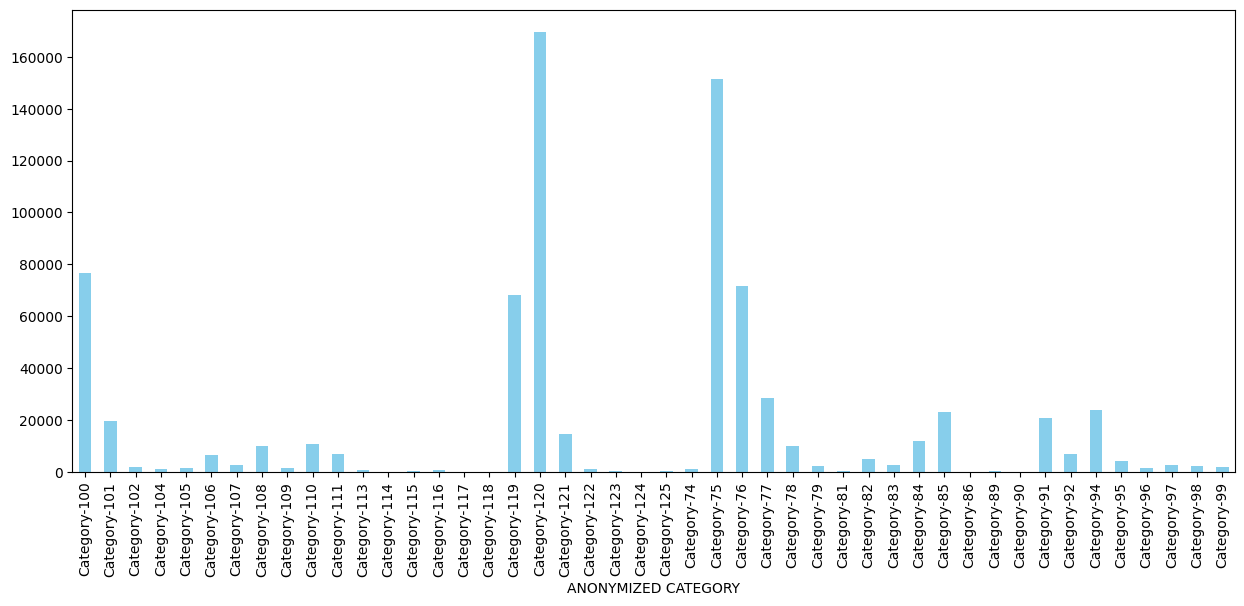

In [ ]:
#Plotting chart for QUANTITY by ANONYMIZED CATEGORY
plt.figure(figsize=(15, 6))
category_by_quantity_value['QUANTITY'].plot(kind='bar', color='skyblue')


<Axes: xlabel='ANONYMIZED CATEGORY'>

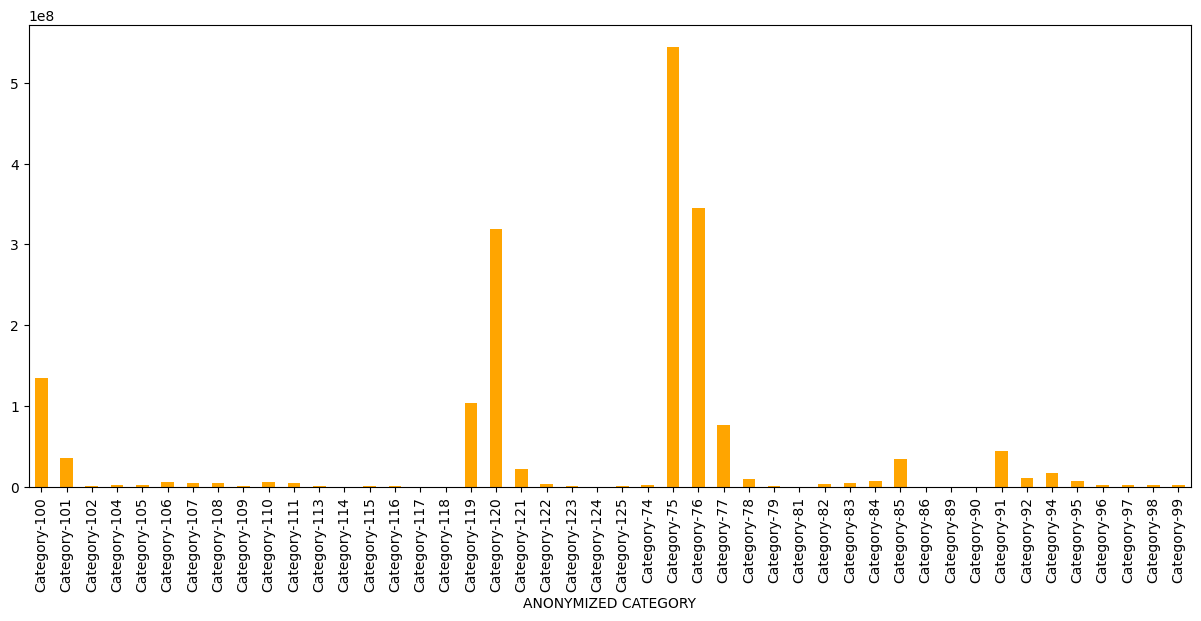

In [ ]:
#Plotting chart for VALUE by ANONYMIZED CATEGORY
plt.figure(figsize=(15, 6))
category_by_quantity_value['VALUE'].plot(kind='bar', color='orange')

###Total Quantity and Value by Anonymized Business

In [ ]:
#Calculate total Quantity and Value grouped by Anonymized Business
business_by_quantity_value = data.groupby('ANONYMIZED BUSINESS')[['QUANTITY', 'VALUE']].sum()
print(business_by_quantity_value)

                     QUANTITY     VALUE
ANONYMIZED BUSINESS                    
Business-0000               8   10445.0
Business-0005               1    2645.0
Business-0029              26   77340.0
Business-003d              98  221761.0
Business-0072             127  225056.0
...                       ...       ...
Business-ffa9               3    6740.0
Business-ffae               6   10530.0
Business-ffb1             266  438115.0
Business-ffd2              37   67723.0
Business-ffff             110  110285.0

[4800 rows x 2 columns]


4800 rows may not be easily visualized as in the previous section.


## Trends over Time


### Sales Trends (Values) Over Time

In [ ]:
#Value Trend Over Time
# Convert Month_Year to datetime format
data['Month_Year'] = pd.to_datetime(data['Month_Year'], format='%b %Y')

# Group by Month_Year and sum VALUE
sales_trend = data.groupby(data['Month_Year'].dt.to_period('M'))['VALUE'].sum()

# Sort the data (it will already be sorted by period)
sales_trend = sales_trend.sort_index()

# Reset index to display Month_Year in desired format (optional)
sales_trend.index = sales_trend.index.strftime('%b %Y')

print(sales_trend)


Month_Year
Jan 2024    1.856324e+08
Feb 2024    1.266021e+08
Mar 2024    1.160112e+08
Apr 2024    1.221122e+08
May 2024    1.688151e+08
Jun 2024    1.351764e+08
Jul 2024    1.710446e+08
Aug 2024    1.466219e+08
Sep 2024    1.377915e+08
Oct 2024    1.838406e+08
Nov 2024    1.659331e+08
Dec 2024    1.095688e+08
Name: VALUE, dtype: float64


Text(0.5, 1.0, 'Sales Trend Over Time')

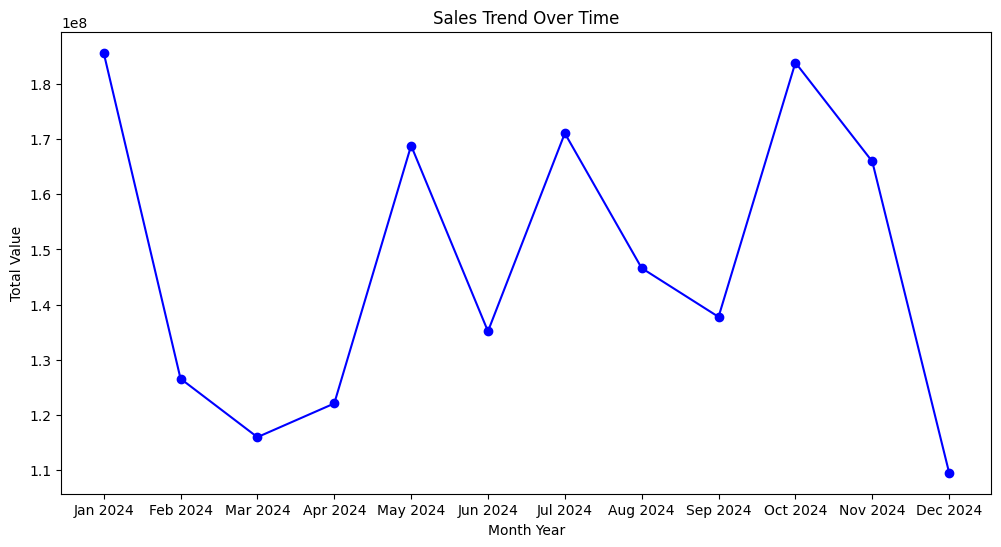

In [ ]:
# Plotting VALUE over time
plt.figure(figsize=(12, 6))

# Plot VALUE
plt.plot(sales_trend.index, sales_trend, label='Value', color='blue', marker='o')
#labels
plt.xlabel('Month Year')
plt.ylabel('Total Value')
plt.title('Sales Trend Over Time')

### Sales Trends (Quantity) Over Time

In [ ]:
#Sales Trend and sort by Month_Year
# Convert Month_Year to datetime format
data['Month_Year'] = pd.to_datetime(data['Month_Year'], format='%b %Y')

# Group by Month_Year and sum QUANTITY
qty_trend = data.groupby(data['Month_Year'].dt.to_period('M'))['QUANTITY'].sum()

# Sort the data (it will already be sorted by period)
qty_trend = qty_trend.sort_index()

# Reset index to display Month_Year in desired format (optional)
qty_trend.index = qty_trend.index.strftime('%b %Y')

print(qty_trend)


Month_Year
Jan 2024    67526
Feb 2024    44063
Mar 2024    45385
Apr 2024    50555
May 2024    69561
Jun 2024    60731
Jul 2024    74693
Aug 2024    68859
Sep 2024    66747
Oct 2024    84739
Nov 2024    75361
Dec 2024    57636
Name: QUANTITY, dtype: int64


Text(0.5, 1.0, 'Sales Trend Over Time')

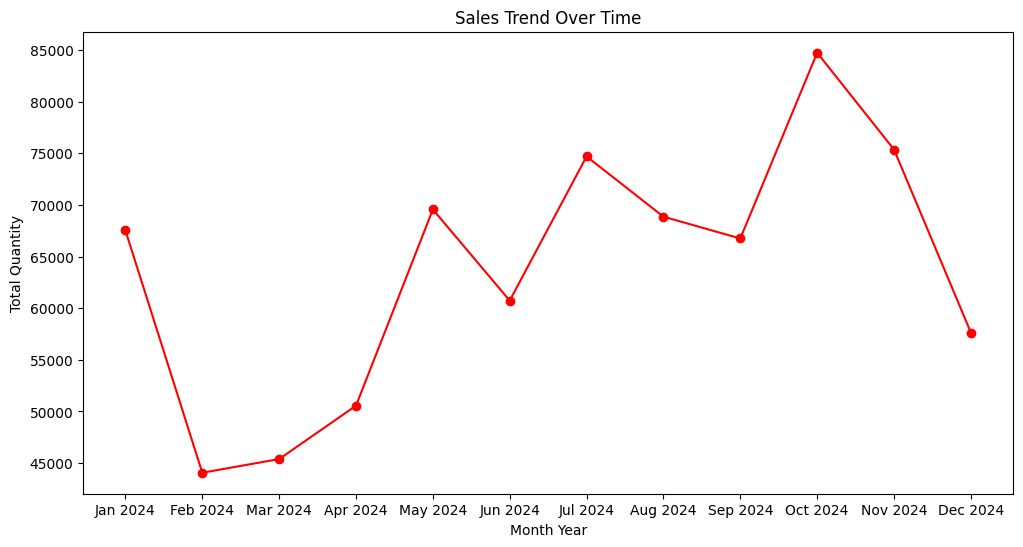

In [ ]:
# Plot sales trend for  QUANTITY
plt.figure(figsize=(12, 6))

# Plot QUANTITY
plt.plot(qty_trend.index, qty_trend, label='Quantity', color='red', marker='o')
#labels
plt.xlabel('Month Year')
plt.ylabel('Total Quantity')
plt.title('Sales Trend Over Time')

## Performance Analysis

### Top 5 most  purchased products based on Quantity

In [ ]:
# Top 5 most  purchased products based on Quantity
top_5_products_qty = data.groupby('ANONYMIZED PRODUCT')['QUANTITY'].sum().nlargest(5)
top_5_products_qty.head()

,QUANTITY
ANONYMIZED PRODUCT,
Product-66e0,46957
Product-e805,42605
Product-8f75,37568
Product-29ee,35940
Product-4156,28488


### Top 5 most  purchased products based on Value

In [ ]:
# Top 5 most  purchased products based on Value
top_5_products_value = data.groupby('ANONYMIZED PRODUCT')['VALUE'].sum().nlargest(5)
top_5_products_value.head()

,VALUE
ANONYMIZED PRODUCT,
Product-e805,262805627.0
Product-8f75,158805360.0
Product-66e0,70704225.0
Product-29ee,68248274.0
Product-4156,56957907.0


We see that there is a mismatch between the top five most purchased products based on quantity and the top five most purchased products based on value. This can be explained by the products having different unit prices.

# 3. Advanced Analysis

## Customer Segmentation

###Segmentation Analysis of Businesses

In [ ]:
#Checking number of unique businesses
data['ANONYMIZED BUSINESS'].nunique()

4800

In [ ]:
#Segmentation Analysis of Anonymized Business based on QUANTITY, VALUE, FREQUENCY OF ANONYMIZED BUSINESS
segmentation_data = data.groupby('ANONYMIZED BUSINESS').agg({
    'QUANTITY': 'sum',
    'VALUE': 'sum',
    'ANONYMIZED PRODUCT': 'count'
}).reset_index()
#rename columns
segmentation_data.rename(columns={'QUANTITY': 'Total Quantity', 'VALUE': 'Total Value','ANONYMIZED PRODUCT': 'Freq of Transactions'}, inplace=True)
print(segmentation_data)


     ANONYMIZED BUSINESS  Total Quantity  Total Value  Freq of Transactions
0          Business-0000               8      10445.0                     8
1          Business-0005               1       2645.0                     1
2          Business-0029              26      77340.0                     6
3          Business-003d              98     221761.0                    31
4          Business-0072             127     225056.0                   101
...                  ...             ...          ...                   ...
4795       Business-ffa9               3       6740.0                     3
4796       Business-ffae               6      10530.0                     5
4797       Business-ffb1             266     438115.0                   105
4798       Business-ffd2              37      67723.0                    22
4799       Business-ffff             110     110285.0                   107

[4800 rows x 4 columns]


SQL Version

```
--Create segmentation data from data  
CREATE OR REPLACE TABLE `my-new-work-450810.anonymized.segmentation_data` AS  
SELECT
    `ANONYMIZED BUSINESS`,
    SUM(QUANTITY) AS `Total Quantity`,
    SUM(VALUE) AS `Total Value`,
    COUNT(DISTINCT `ANONYMIZED PRODUCT`) AS `Freq of Transactions`  -- Count distinct products
  FROM
    `my-new-work-450810.anonymized.data`  -- Replace with your original table
  GROUP BY `ANONYMIZED BUSINESS`;
```



We see that the total quanity is not necessarily equal to the frequency of transactions. The reason is that a business is not limited to buying only one unit of a product, that is, for every transaction, the quantity is greater than equal to one.

### Classifying the Businesses into Three Groups

Value classified on the following basis:
1. High Value = above 1,000,000 (Total Value)
2. Medium Value = 100,000 -1,000,000 (Total Value)
3. Low Value = 0-99,999 (Total Value)

In [ ]:
#Classify businesses into 3 groups
segmentation_data['Segment'] = [
    'High Value' if x > 1000000 else ('Medium Value' if x > 100000 else 'Low Value') for x in segmentation_data['Total Value']
]
print(segmentation_data)

     ANONYMIZED BUSINESS  Total Quantity  Total Value  Freq of Transactions  \
0          Business-0000               8      10445.0                     8   
1          Business-0005               1       2645.0                     1   
2          Business-0029              26      77340.0                     6   
3          Business-003d              98     221761.0                    31   
4          Business-0072             127     225056.0                   101   
...                  ...             ...          ...                   ...   
4795       Business-ffa9               3       6740.0                     3   
4796       Business-ffae               6      10530.0                     5   
4797       Business-ffb1             266     438115.0                   105   
4798       Business-ffd2              37      67723.0                    22   
4799       Business-ffff             110     110285.0                   107   

           Segment  
0        Low Value  
1        

SQL Version
```
--Segmenting Businesses by Total Value
SELECT
    `ANONYMIZED BUSINESS`,
    `Total Value`,
    CASE
        WHEN `Total Value` < 100000 THEN 'Low Value'
        WHEN `Total Value` >= 100000 AND `Total Value` < 1000000 THEN 'Medium Value'
        WHEN `Total Value` >= 1000000 THEN 'High Value'
        ELSE 'Unknown'  -- Should not happen, but good practice
    END AS Segment
FROM `my-new-work-450810.anonymized.segmentation_data`;
--Outputs data with a new column called Segment

```

In [ ]:
#export this table
segmentation_data.to_csv('segmentation_data.csv', index=False)

In [ ]:
#Counting number of High Value, Medium Value, and Low Value businesses
segmentation_data['Segment'].value_counts()

,count
Segment,
Low Value,3021
Medium Value,1359
High Value,420


### Recommendations

1. High Value Businesses
* Dedicated Account Management: Assign a dedicated account manager to offer personalized attention, address their needs promptly, and anticipate future requirements.
* Regular Check-ins: Maintain regular communication through monthly or quarterly business reviews.
2. Medium Value
* Upselling and Cross-selling: Identify opportunities for upselling or cross-selling based on their past behavior or industry trends.
* Loyalty Programs: Introduce loyalty programs to incentivize repeat business, such as discounts, credits, or other rewards.
3. Low Value
* Incentivize Growth: Offer discounts or promotions to encourage larger purchases or greater frequency of orders.
* Referral Programs: Encourage these businesses to refer new clients or customers, offering them incentives like discounts or bonuses for successful referrals.

## Forecasting with ARIMA

In [ ]:
#Group value by Month_Year
monthly_data = data.groupby('Month_Year')['VALUE'].sum().reset_index()
monthly_data.head(12)

,Month_Year,VALUE
0,2024-01-01,1.856324e+08
1,2024-02-01,1.266021e+08
2,2024-03-01,1.160112e+08
3,2024-04-01,1.221122e+08
4,2024-05-01,1.688151e+08
5,2024-06-01,1.351764e+08
6,2024-07-01,1.710446e+08
7,2024-08-01,1.466219e+08
8,2024-09-01,1.377915e+08
9,2024-10-01,1.838406e+08


In [ ]:
#Fitting an ARIMA model
#Importing the ARIMA library
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model on VALUE
model = ARIMA(monthly_data['VALUE'], order=(2, 0, 0))
model_fit = model.fit()

In [ ]:
# Forecast the next 3 months
forecast = model_fit.forecast(steps=3)
print("Forecast for the next 3 months:")
print(forecast)

Forecast for the next 3 months:
12    1.436975e+08
13    1.635732e+08
14    1.472901e+08
Name: predicted_mean, dtype: float64


<ipython-input-86-b4e0c2d8d2f4>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start='2025-01-31', periods=3, freq='M')


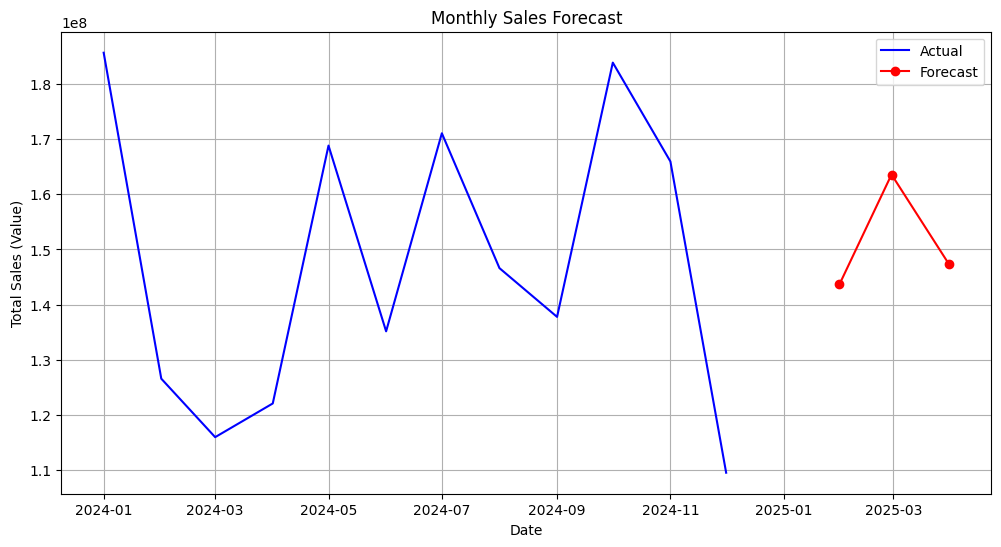

In [ ]:
# Plotting VALUE in 2024 and forecasted 3 months
plt.figure(figsize=(12, 6))
#plotting monthly_data
plt.plot(monthly_data['Month_Year'], monthly_data['VALUE'], label='Actual', color='blue')
# Plot forecasted VALUE
forecast_index = pd.date_range(start='2025-01-31', periods=3, freq='M')
plt.plot(forecast_index, forecast, marker='o', color='red', label='Forecast')
#labels
plt.title('Monthly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales (Value)')
plt.legend()
plt.grid(True)
plt.show()

##Correlation Analysis

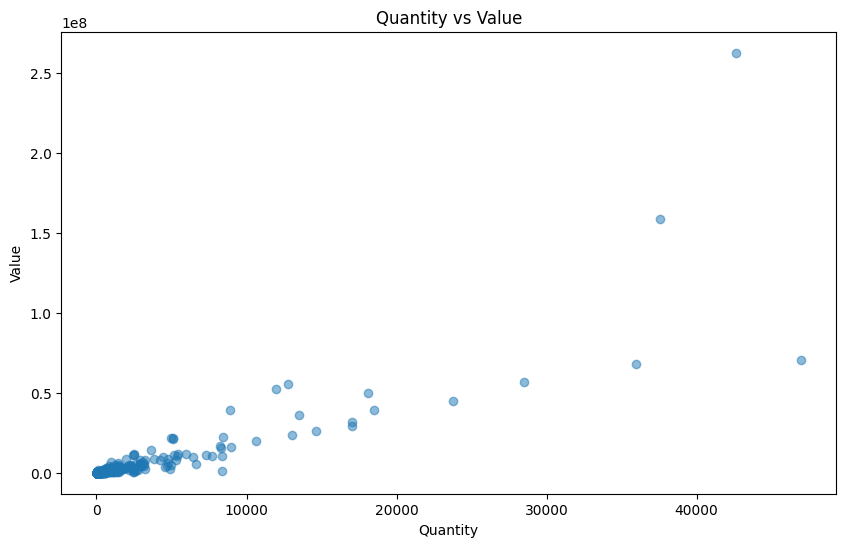

In [ ]:
#plot Quantity and Value
plot_data = data.groupby('ANONYMIZED PRODUCT').agg({'QUANTITY': 'sum', 'VALUE': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(plot_data['QUANTITY'], plot_data['VALUE'], alpha=0.5)
plt.title('Quantity vs Value')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.show()

Insights from the above visualization on Quantity vs Value
1. Non-Linear Relationship: The relationship between Quantity and Value does not seem to be perfectly linear.
2. Positive Correlation: There appears to be a positive correlation between Quantity and Value. As the Quantity increases, the Value generally tends to increase as well.

##Anomaly Detection

###Anomaly Detection in Terms of Quantity

We can check quantity over time to see if there are any unusual spikes or drops in sales.

Text(0.5, 1.0, 'Sales Trend Over Time')

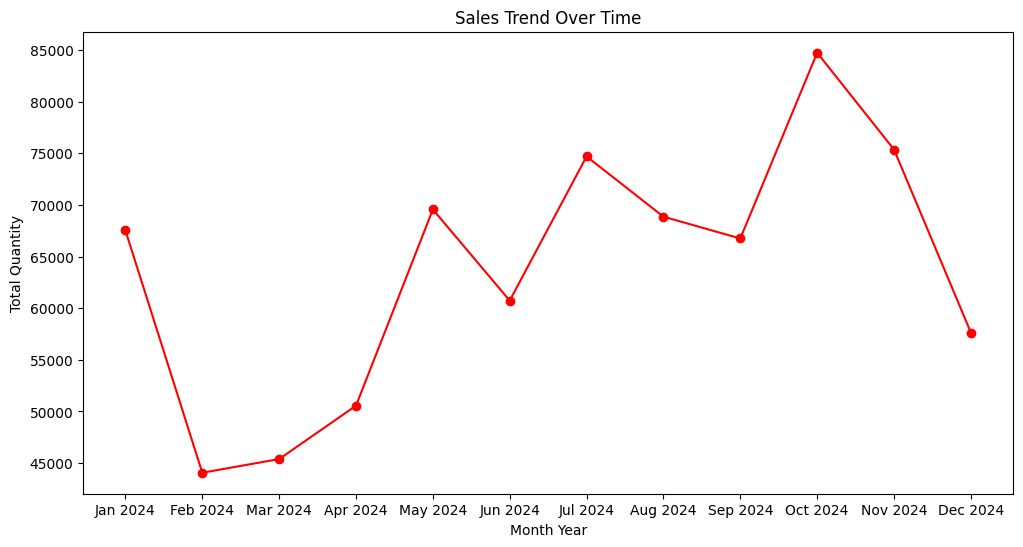

In [ ]:
# Plot sales trend for QUANTITY
plt.figure(figsize=(12, 6))

# Plot QUANTITY
plt.plot(qty_trend.index, qty_trend, label='Quantity', color='red', marker='o')
#labels
plt.xlabel('Month Year')
plt.ylabel('Total Quantity')
plt.title('Sales Trend Over Time')

**Volatility**: Sales quantity shows significant fluctuations throughout the year, indicating inconsistent performance.

**Key Peaks:** Notable sales peaks occurred in October (highest), followed by smaller peaks in May and July.  

**Significant Drop:** A sharp decline in sales is evident from January to February.

**Need for Context:** To pinpoint the exact causes, additional context is crucial.

**Possible Drivers:** The fluctuations likely stem from a combination of:
* seasonal trends.
* external factors.
* internal factors.
* market dynamics.

###Anomaly Detection in Terms of Value

We can check value over time to see if there are any unusual spikes or drops in sales.

Text(0.5, 1.0, 'Sales Trend Over Time')

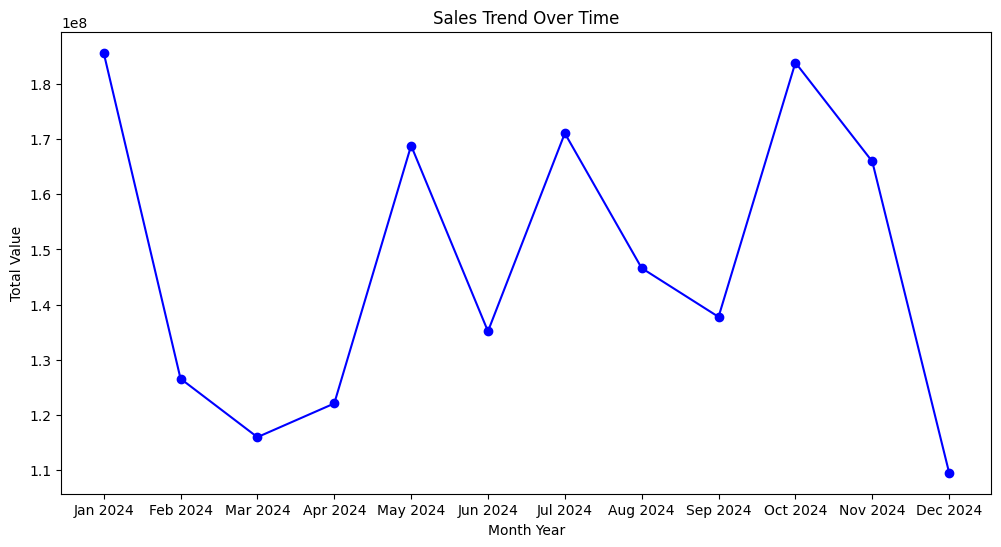

In [ ]:
# Plot sales trend for  VALUE
plt.figure(figsize=(12, 6))

# Plot VALUE
plt.plot(sales_trend.index, sales_trend, label='Value', color='blue', marker='o')
#labels
plt.xlabel('Month Year')
plt.ylabel('Total Value')
plt.title('Sales Trend Over Time')

**Volatility:** Total Value fluctuates significantly throughout the year, indicating inconsistent sales performance.

**Key Peak:** A major peak occurs in October.

**Moderate Peaks:** Smaller peaks are observed in May and July.

**Dramatic Drop:** A sharp and significant decline in Total Value happens in December.

**Need for Further Analysis:** Comparing with sales quantity data, gathering more context about the business and industry is needed for a more accurate understanding of these trends.

**Possible Drivers:** The fluctuations likely stem from a combination of:
* seasonal trends.
* external factors.
* internal factors.
* market dynamics.



# 4. Strategic Insights and Recommendations

## Product Strategy

In [ ]:
#calculate Value grouped by Anonymized Category and sort by ascending
value_by_category = data.groupby('ANONYMIZED CATEGORY')['VALUE'].sum().sort_values(ascending=True)
print(value_by_category)


ANONYMIZED CATEGORY
Category-117    1.550000e+03
Category-86     3.320000e+03
Category-118    7.560000e+03
Category-114    8.600000e+03
Category-124    1.006000e+04
Category-90     1.575000e+04
Category-81     7.206100e+04
Category-89     1.368500e+05
Category-125    2.970600e+05
Category-116    4.227450e+05
Category-115    4.253600e+05
Category-102    4.644630e+05
Category-123    7.307300e+05
Category-79     1.184953e+06
Category-113    1.260667e+06
Category-109    1.263226e+06
Category-104    1.557598e+06
Category-99     1.589480e+06
Category-74     1.929961e+06
Category-96     2.249424e+06
Category-98     2.519695e+06
Category-97     2.628309e+06
Category-105    2.718352e+06
Category-122    3.500920e+06
Category-82     3.930818e+06
Category-83     4.039483e+06
Category-107    4.173901e+06
Category-111    4.387343e+06
Category-108    5.101375e+06
Category-110    5.484384e+06
Category-106    5.932763e+06
Category-84     6.798838e+06
Category-95     7.466932e+06
Category-78     9.79410


Category-117 has 1550.0 value, which is the lowest. Hence, it should be prioritized for marketing campaign.



## Customer Retention

## Operational Efficiency

*Referring to Anomaly Detection Section*

**Suggested Improvements:**

1. Optimized Inventory for Peak Season (October):

**Strategic Stockpiling:** Gradually increase inventory levels of key products leading up to October to meet the anticipated surge in demand.

**Supply Chain Collaboration:** Work closely with suppliers to ensure they can meet the increased order volumes in time.

2. Inventory Reduction Strategy for Post-Peak (December):

**Strategic Promotions**: strategic promotions in November will help clear out excess inventory before the sharp value drop.

3. Addressing February Lows:

**Targeted Promotions:** Develop targeted marketing campaigns or promotions for February to stimulate demand and mitigate the post-holiday slump.

**Evaluate External Factors:** Analyze external factors to understand if the February dip is predictable. If so, adjust inventory and staffing levels accordingly.
4. General Supply Chain Enhancements:

**Supplier Relationship Management**: Strengthen relationships with key suppliers to improve communication, collaboration, and responsiveness to changes in demand.

***Important Note:*** Above are just general suggestions. The most effective improvements will depend on the specific business context and products.

#Exporting Data

We export data for use in creating dashboards.

In [ ]:
#export data
data.to_csv('data.csv', index=False)

In [ ]:
#export segmentation_data
segmentation_data.to_csv('segmentation_data.csv', index=False)